In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [115]:
primary_df = pd.read_csv('Data\Avaluaci__de_sis__d_educaci__prim_ria.csv')
secondary_df = pd.read_csv('Data\Avaluaci__de_quart_d_Educaci__Secund_ria_Obligat_ria_20231112.csv')

<Figure size 640x480 with 0 Axes>

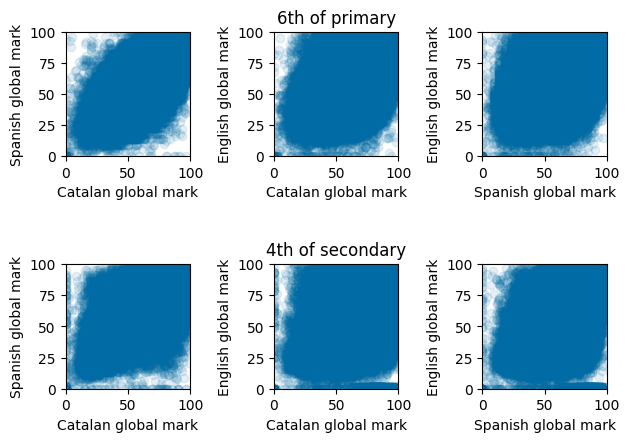

In [116]:
plt.style.use('tableau-colorblind10')
plt.tight_layout()

fig1, ax1 = plt.subplots(2,3)
ax1[0,1].set_title("6th of primary")
ax1[1,1].set_title("4th of secondary")

ax1[0,0].set_box_aspect(1)
ax1[0,0].set_xlim(0,100)
ax1[0,0].set_ylim(0,100)
ax1[0,0].set_xlabel("Catalan global mark")
ax1[0,0].set_ylabel("Spanish global mark")
ax1[0,0].scatter(primary_df['PCAT'],primary_df['PCAST'],alpha = 0.1)

ax1[1,0].set_box_aspect(1)
ax1[1,0].set_xlim(0,100)
ax1[1,0].set_ylim(0,100)
ax1[1,0].set_xlabel("Catalan global mark")
ax1[1,0].set_ylabel("Spanish global mark")
ax1[1,0].scatter(secondary_df['PCAT'],secondary_df['PCAST'],alpha = 0.1)

ax1[0,1].set_box_aspect(1)
ax1[0,1].set_xlim(0,100)
ax1[0,1].set_ylim(0,100)
ax1[0,1].set_xlabel("Catalan global mark")
ax1[0,1].set_ylabel("English global mark")
ax1[0,1].scatter(primary_df['PCAT'],primary_df['PANG'],alpha = 0.1)

ax1[1,1].set_box_aspect(1)
ax1[1,1].set_xlim(0,100)
ax1[1,1].set_ylim(0,100)
ax1[1,1].set_xlabel("Catalan global mark")
ax1[1,1].set_ylabel("English global mark")
ax1[1,1].scatter(secondary_df['PCAT'],secondary_df['PANG'],alpha = 0.1)

ax1[0,2].set_box_aspect(1)
ax1[0,2].set_xlim(0,100)
ax1[0,2].set_ylim(0,100)
ax1[0,2].set_xlabel("Spanish global mark")
ax1[0,2].set_ylabel("English global mark")
ax1[0,2].scatter(primary_df['PCAST'],primary_df['PANG'],alpha = 0.1)

ax1[1,2].set_box_aspect(1)
ax1[1,2].set_xlim(0,100)
ax1[1,2].set_ylim(0,100)
ax1[1,2].set_xlabel("Spanish global mark")
ax1[1,2].set_ylabel("English global mark")
ax1[1,2].scatter(secondary_df['PCAST'],secondary_df['PANG'],alpha = 0.1)
plt.tight_layout()


           PCAT     PCAST      PANG
PCAT   1.000000  0.772289  0.674851
PCAST  0.772289  1.000000  0.645921
PANG   0.674851  0.645921  1.000000 
 
            PCAT     PCAST      PANG
PCAT   1.000000  0.678932  0.623503
PCAST  0.678932  1.000000  0.638134
PANG   0.623503  0.638134  1.000000


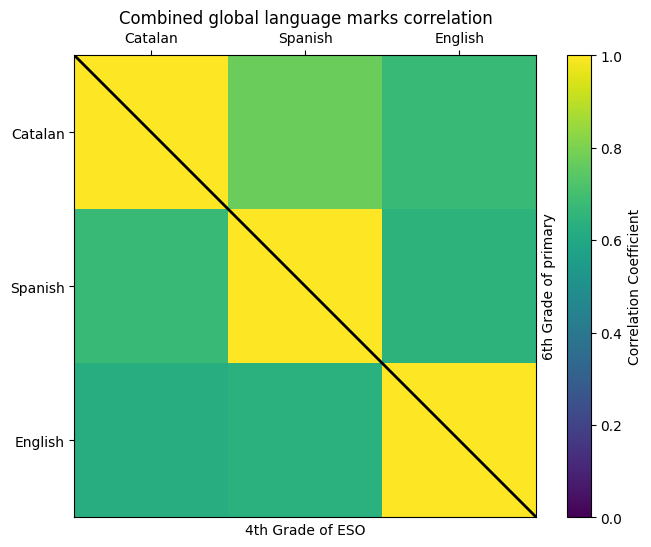

In [128]:
fields = ['PCAT','PCAST','PANG']
fields_labels = ['Catalan', 'Spanish', 'English']

correlations_1 = primary_df[fields].corr()
correlations_2 = secondary_df[fields].corr()
combined_correlations = np.zeros_like(correlations_1)
combined_correlations[np.triu_indices_from(combined_correlations)] = correlations_1.values[np.triu_indices_from(correlations_1)]
combined_correlations[np.tril_indices_from(combined_correlations, k=-1)] = correlations_2.values[np.tril_indices_from(correlations_2, k=-1)]
print(correlations_1, '\n',  '\n',correlations_2)

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(np.arange(len(correlations_1.columns)+1)-0.5, np.arange(len(correlations_1.index)+1)-0.5, color='black', linewidth=2)
ax.imshow(combined_correlations, cmap='viridis', vmin=0, vmax=1, interpolation='nearest')
fig.colorbar(im, ax=ax, label='Correlation Coefficient')
ax.set_title('Combined global language marks correlation')
ax.set_xticks(range(len(combined_correlations)),labels = fields_labels, rotation = 0)
ax.set_yticks(range(len(combined_correlations)),labels = fields_labels, rotation = 0)
ax.xaxis.tick_top()
ax.set_xlabel('4th Grade of ESO')
ax.set_ylabel('6th Grade of primary')
ax.yaxis.set_label_position('right')

Grades correlations between all three languages are positive, with a strongest correlation between catalan and spanish. The correlation for all trhee language pairs is higher at 6th grade of primary school than in 4th grade of secondary school. 